# 1. Generators, Iterators, and Decorators
## Iterable
An object you can loop over using a for loop. Must implement the `__iter__()` method.  
Eg: list, tuple, dict, str

In [2]:
my_list = [1, 2, 3]
print(type(my_list))        
print(hasattr(my_list, '__iter__'))  
print(hasattr(my_list, '__next__'))

<class 'list'>
True
False


> Iterable can produce an iterator but is not itself an iterator (unless it implements `__next__` too)

## Iterators
An object that represents **a stream of data**, can give one item at a time. It has two methods:
- `__iter__()`: returns the iterator object
- `__next__()`: returns the next value

Like a vending machine, you press the button each time to get the next snack.

In [7]:
my_list = [1, 2, 3]
it = iter(my_list)
print(next(it))  # 1
print(next(it))  # 2
print(next(it))  # 3
# next(it) # would raise StopIteration

1
2
3


In [6]:
print(type(my_list))
print(type(iter(my_list)))

<class 'list'>
<class 'list_iterator'>


Behind the scenes, a for loop is just using iter() + next() in a try/except loop:

In [5]:
iterator = iter(my_list)
while True:
    try:
        x = next(iterator)
    except StopIteration:
        break
    else:
        print(x)

1
2
3


### Custom Iterator
can make your own iterator by creating a class with `__iter__` and `__next__`.

In [8]:
class Counter:
    def __init__(self):
        self.current = 0
        self.max = 5

    def __iter__(self):
        return self

    def __next__(self):
        if self.current < self.max:
            self.current += 1
            return self.current
        raise StopIteration

c = Counter()
for i in c:
    print(f'my counter: {i}')

my counter: 1
my counter: 2
my counter: 3
my counter: 4
my counter: 5


## Generator
A generator is a simpler way **to create iterators using the yield keyword**, i.e. it is a special type of iterator  

A coffee machine that makes one cup at a time instead of preparing all at once.   

Advantage: Saves memory because it produces items on the fly

> Real-world use: **Reading huge files line by line without loading everything into memory**.

In [ ]:
def countdown(n):
    while n > 0:
        yield n
        n -= 1

for num in countdown(3):
    print(num)
# Output: 3, 2, 1

3
2
1


In [11]:
def fibonacci(limit):
    a, b = 0, 1
    while a < limit:
        yield a
        a, b = b, a + b

f = fibonacci(5)
while True:
    try:
        x = next(f)
    except StopIteration:
        break
    else:
        print(x)

0
1
1
2
3


In [10]:
def my_generator():
    yield 'first'
    yield 'second'
    yield 'third'

g = my_generator()
print(next(g))  # 'first'
print(next(g))  # 'second'
print(next(g))  # 'third'

first
second
third


### Generator Expression
Similar to list comprehension but lazy-evaluated (produces values one by one).  
Key difference: 
- List comprehension [...] creates a whole list in memory
- generator (…) yields items one by one.

In [12]:
numbers = [1, 2, 3, 4, 5]
squares = (x**2 for x in numbers)  # notice parentheses
print(next(squares))  # 1
print(next(squares))  # 4

1
4


## Decorator
A decorator is a function that takes **another function as input**, adds some extra behavior, and returns a new function, without modifying the original one.

Like wrapping a gift — you’re not changing the gift, just adding decoration.

> It’s often used for **logging, timing, or authentication**.
> 
> 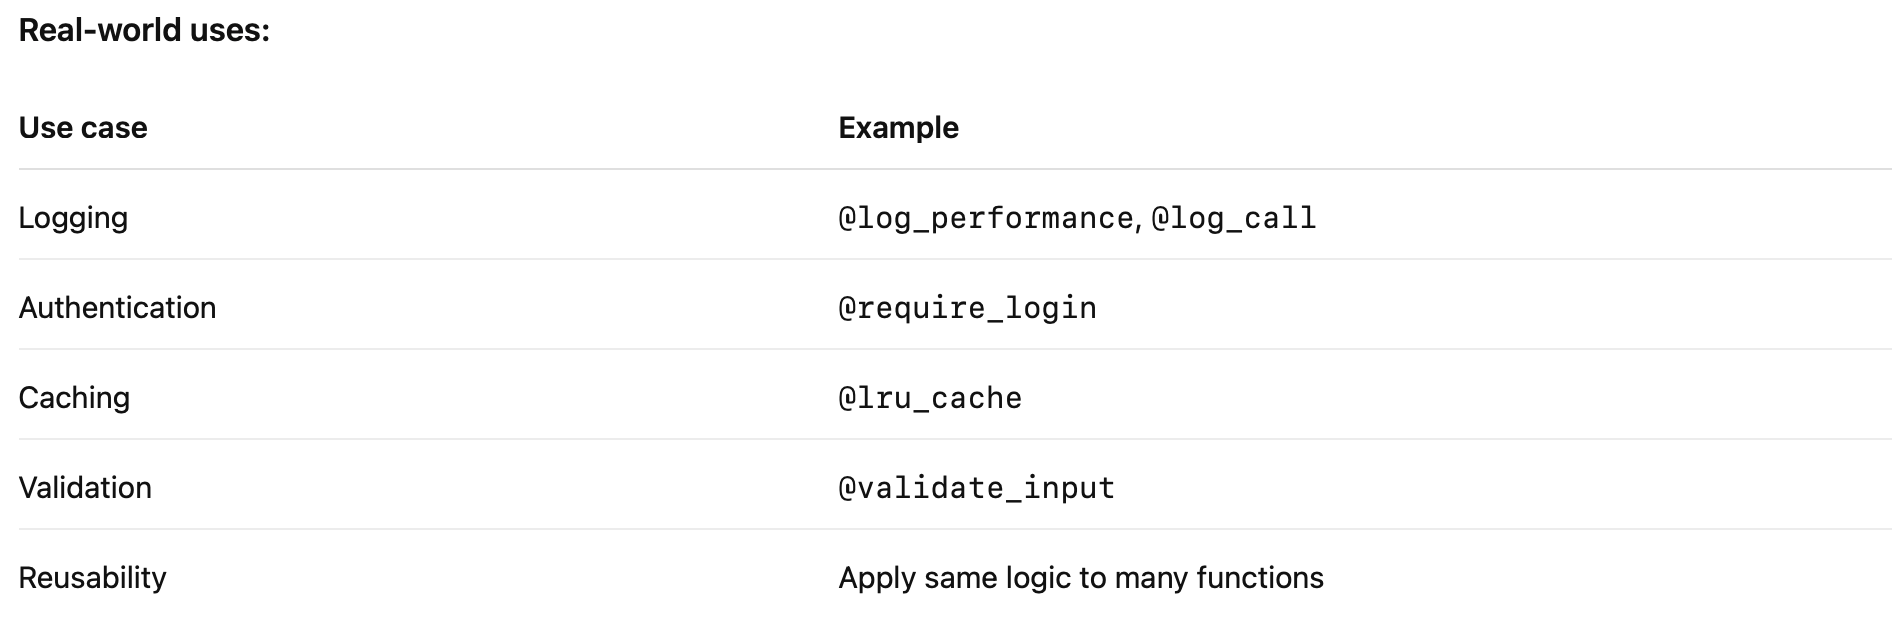

### Basic Decorator Example

In [28]:
def my_decorator(func):
    def wrapper():
        print("my decorator is called")
        func()
    print('gonna return wrapper of my_decorator')
    return wrapper

@my_decorator
def fun1():
    print("func1")

fun1()

gonna return wrapper of my_decorator
my decorator is called
func1


- `@my_decorator` means:  
fun1 = my_decorator(fun1)  
- When you call fun1(), it actually runs wrapper() inside my_decorator

### Decorator with Arguments (Parameterized Decorator)

In [27]:
import time

# log_performance(level="INFO") is a decorator factory
# a function that returns a decorator.
def log_performance(level="INFO"):
    print('log_performance is called')
    
    def decorator(func):
        
        def wrapper(*args, **kwargs):
            start = time.time()
            
            print('run the wrapper of log_performance')
            
            result = func(*args, **kwargs)
            end = time.time()
            print(f"[{level}] {func.__name__} is taking {end - start:.4f} seconds")
            return result
        
        print('gonna return wrapper of log_performance')
        return wrapper
    print('gonna return decorator of log_performance')
    return decorator

@log_performance(level="DEBUG")
def fun2():
    print("func2 running")
    for _ in range(1000000):
        pass

fun2()

log_performance is called
gonna return decorator of log_performance
gonna return wrapper of log_performance
run the wrapper of log_performance
func2 running
[DEBUG] fun2 is taking 0.0153 seconds


- `@log_performance("DEBUG")` first calls log_performance("DEBUG"), returning a decorator.
- That decorator wraps fun1() and times its execution.

### Stacking Decorators

In [29]:
@my_decorator
@log_performance()
def fun3():
    print('func3')
    for i in range(100000):
        pass

fun3()

log_performance is called
gonna return decorator of log_performance
gonna return wrapper of log_performance
gonna return wrapper of my_decorator
my decorator is called
run the wrapper of log_performance
func3
[INFO] fun3 is taking 0.0015 seconds


1. fun3 is first wrapped by `@log_performance()` → returns wrapper1
2. Then `@my_decorator` wraps wrapper1 → returns wrapper2  

✅ Execution order:  
@outer  
@inner   
→ means outer(inner(func)).

### Higher-order functions
Is any function that does at least one of the following:  
- Takes another function as an argument, or
- Returns a function as a result.

Basically, it treats functions as data, passing them around just like variables.

All decorators are higher-order functions, but not all higher-order functions are decorators (unless you use @ syntax)

In [ ]:
def enhance_with_log_performance(func):
    def new_func():
        func()
    return new_func

In [30]:
# Function as an argument
def greet(name):
    print(f"Hello, {name}!")

def run_twice(func):
    func("Alice")
    func("Bob")

run_twice(greet)

Hello, Alice!
Hello, Bob!


In [31]:
# Function returning another function
def make_multiplier(n):
    def multiplier(x):
        return x * n
    return multiplier

double = make_multiplier(2)
triple = make_multiplier(3)

print(double(5))  # 10
print(triple(5))  # 15

10
15


A decorator is just a higher-order function that takes a function and returns a function.  

Python has many **built-in higher-order functions** because they accept other functions as arguments: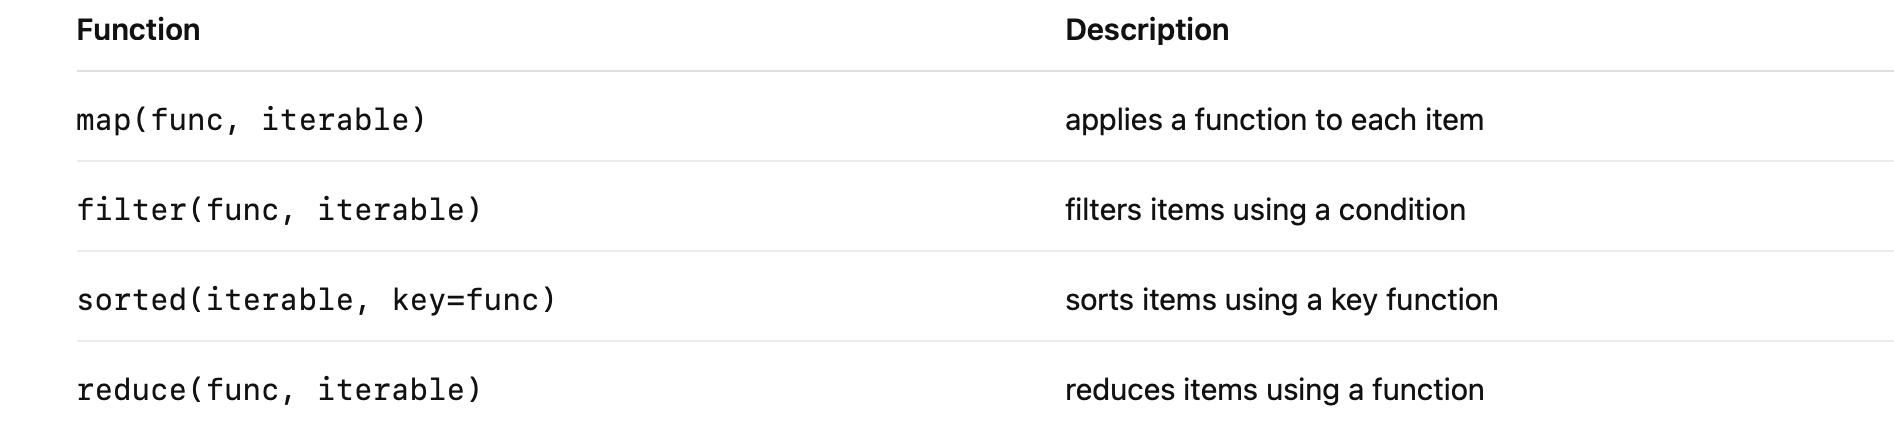

In [32]:
numbers = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, numbers))
even = list(filter(lambda x: x % 2 == 0, numbers))
print(squared)  # [1, 4, 9, 16, 25]
print(even)     # [2, 4]

[1, 4, 9, 16, 25]
[2, 4]


can use HOFs to create flexible logic that changes at runtime:

In [33]:
# choose_operation is a higher-order function that 
# returns a function based on input.
def choose_operation(op):
    def add(a, b): return a + b
    def sub(a, b): return a - b
    def mul(a, b): return a * b
    
    if op == "add": return add
    elif op == "sub": return sub
    elif op == "mul": return mul

operation = choose_operation("mul")
print(operation(3, 5))  # 15

15


Why Higher-Order Functions are Useful
- **Reusability** → Avoid repeating logic
- **Abstraction** → Hide implementation details
- **Flexibility** → Pass functions dynamically
- **Foundation for decorators** → They are higher-order functions

# 2. Concurrency and Parallelism
Concurrency and parallelism both deal with executing multiple tasks, but in different ways:
- **Concurrency** means tasks *appear* to run simultaneously, it is about dealing with many tasks (e.g., switching between tasks).
- **Parallelism** means tasks *actually* run at the same time on multiple CPUs, it is about doing many tasks at the same time..
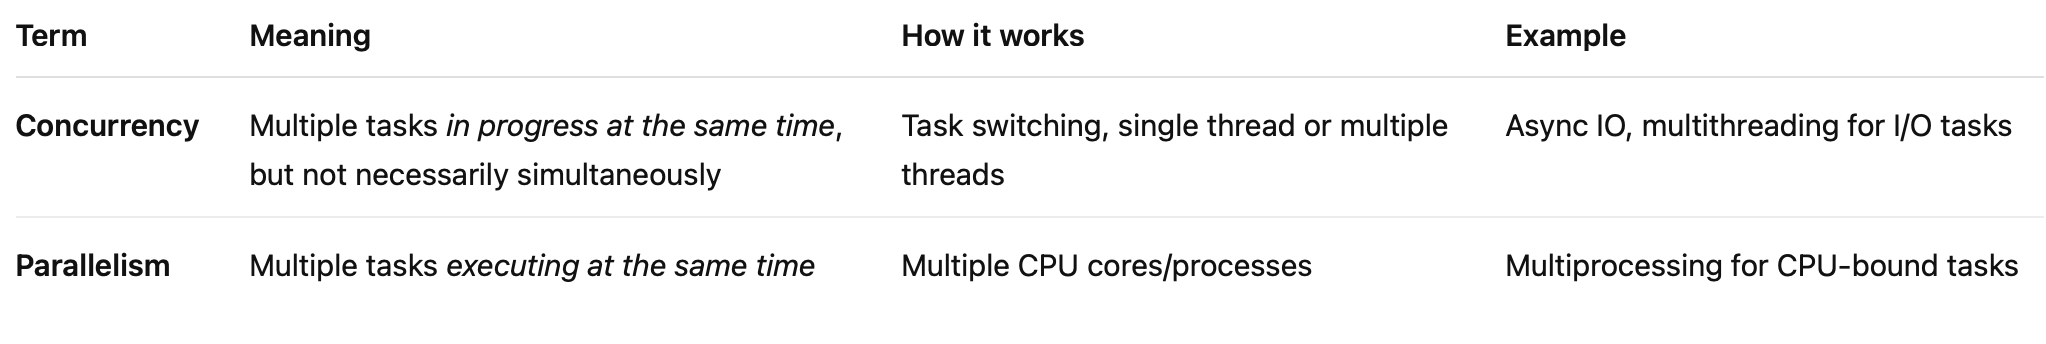

## Multithreading
Great for **I/O-bound tasks** (waiting on input/output like reading files, sleep, read Database, make api call to to other service).  
**Threads share the same memory space**, so they’re lightweight, but limited by the **GIL (Global Interpreter Lock)**, which allows only <u>one Python thread to execute at a time</u>.

In [35]:
import time
import threading

def fake_blocking_io_task(name):
    """Simulate blocking I/O (e.g., file read, API call)."""
    print(f"{name} start blocking I/O task")
    time.sleep(2)
    print(f"{name} done ")

def threading_run():
    threads = []
    start = time.time()
    for i in range(5):
        # Launch multiple threads
        t = threading.Thread(target=fake_blocking_io_task, args=(f"task {i}",))
        threads.append(t)
        t.start()

    for t in threads:
        t.join()

    print(f"[Threading] Total time: {time.time() - start:.2f} seconds")

threading_run()

task 0 start blocking I/O task
task 1 start blocking I/O task
task 2 start blocking I/O task
task 3 start blocking I/O task
task 4 start blocking I/O task
task 1 done task 4 done 
task 2 done 
task 0 done 
task 3 done 

[Threading] Total time: 2.01 seconds


- Each thread runs a blocking I/O task.
- Even though each task takes 2 seconds, total time ≈ 2s (not 10s) because threads wait concurrently.

## Multiprocessing
Great for **CPU-bound tasks** (cpu calculation heavy task, e.g., data crunching, number calculations).  
**Each process runs in a separate memory space** with its own Python interpreter, so bypassing the GIL.

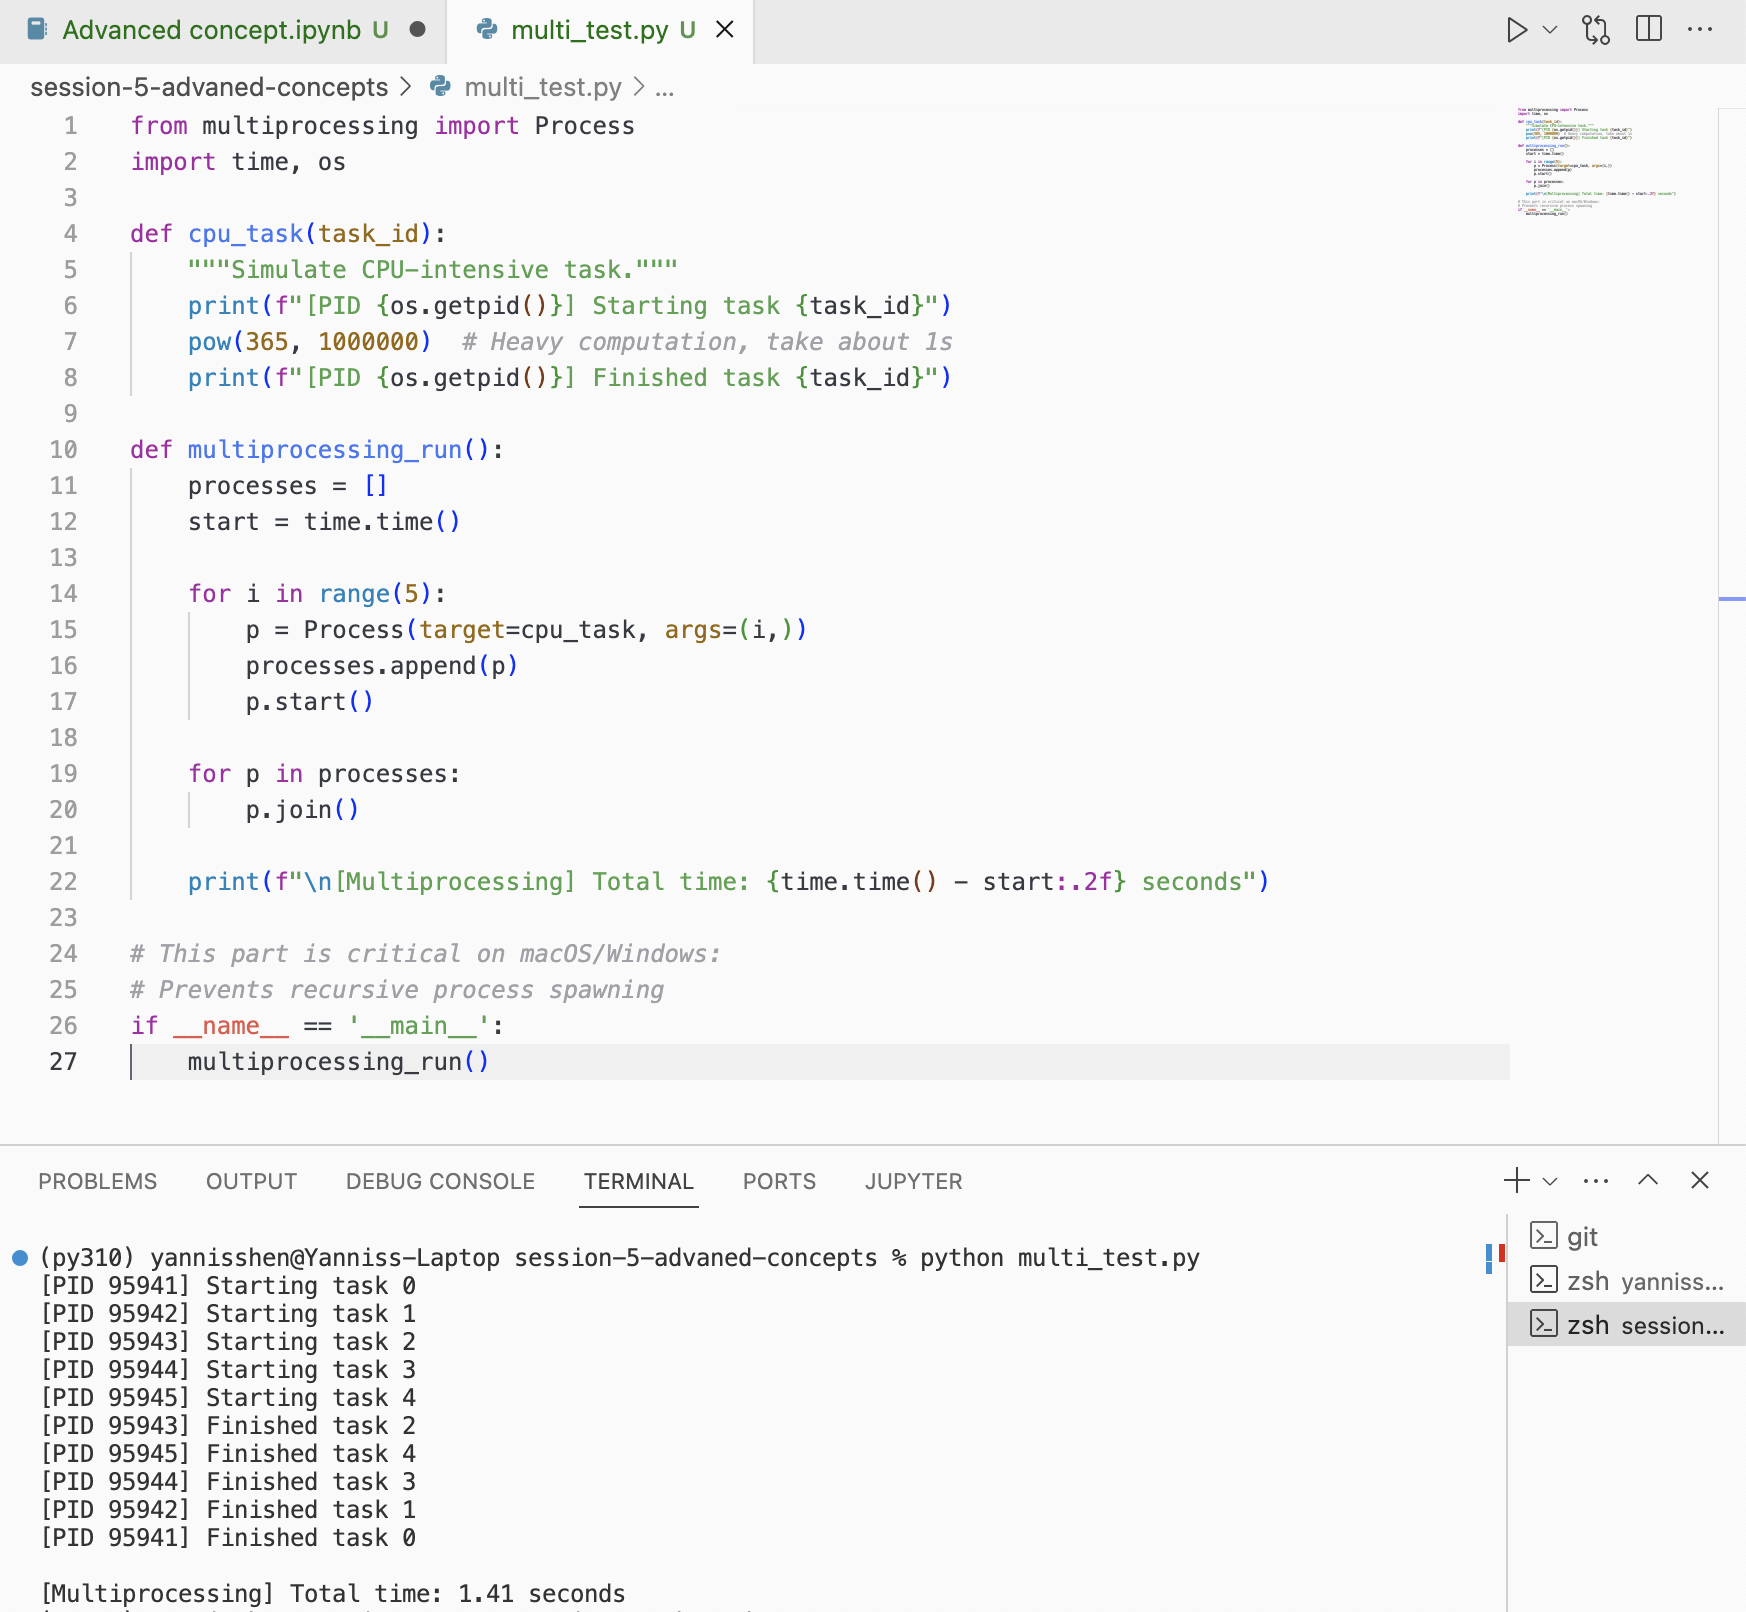

In [42]:
!python multi_test.py

[PID 95995] Starting task 3
[PID 95993] Starting task 1
[PID 95992] Starting task 0
[PID 95996] Starting task 4
[PID 95994] Starting task 2
[PID 95995] Finished task 3
[PID 95994] Finished task 2
[PID 95992] Finished task 0
[PID 95996] Finished task 4
[PID 95993] Finished task 1

[Multiprocessing] Total time: 1.47 seconds


- Each process runs *truly in parallel* on separate CPU cores.
- Total time ≈ 1–2s instead of 5–10s, since processes run simultaneously.

## Async IO
Ideal for **I/O-bound tasks** that *can be paused and resumed* (like network calls).
It uses **async / await** syntax with the **event loop**.

In [44]:
!python async_example.py

task 0 start async I/O task
task 1 start async I/O task
task 2 start async I/O task
task 3 start async I/O task
task 4 start async I/O task
task 0 done
task 1 done
task 2 done
task 3 done
task 4 done
[Async IO] Total time: 2.00 seconds


- asyncio.gather() runs all 5 tasks “concurrently” in a single thread.
- Each waits for I/O, allowing others to run.
- Total time ≈ 2s, not 10s.

### internals of async tasks
In Python asyncio, async tasks **aren’t threads**, they are **coroutines**. So they don’t have “pause/resume” like threads” at the OS level, but you can *observe and control their state using the asyncio.Task API*. You can **create tasks, check if they’re done, cancel them, or even await them partially**.  

Here’s how to **inspect async tasks** and “pause/resume” them conceptually:

In [45]:
!python internal_async.py

Task-2 done? False
Task-3 done? False
Task-4 done? False
task 0 start
task 0 running step 1/3
task 1 start
task 1 running step 1/3
task 2 start
task 2 running step 1/3
task 0 running step 2/3
task 1 running step 2/3
task 2 running step 2/3

--- After 2 seconds ---
Task 0 done? False
Task 1 done? False
Task 2 done? False

--- Canceling task 1 ---
task 0 running step 3/3
task 2 running step 3/3
task 0 done
task 2 done
Task-3 was cancelled

All results: ['task 0 result', 'task 2 result']


1.	Task states: Use task.done() to see if the task has completed.
2.	Pause simulation: You can use await asyncio.sleep() to yield control (tasks are paused while awaiting).
3.	Cancel tasks: task.cancel() lets you “stop” a task mid-way.
4.	Resume: Tasks automatically resume after await finishes — that’s how async scheduling works.

Key properties of asyncio.Task:
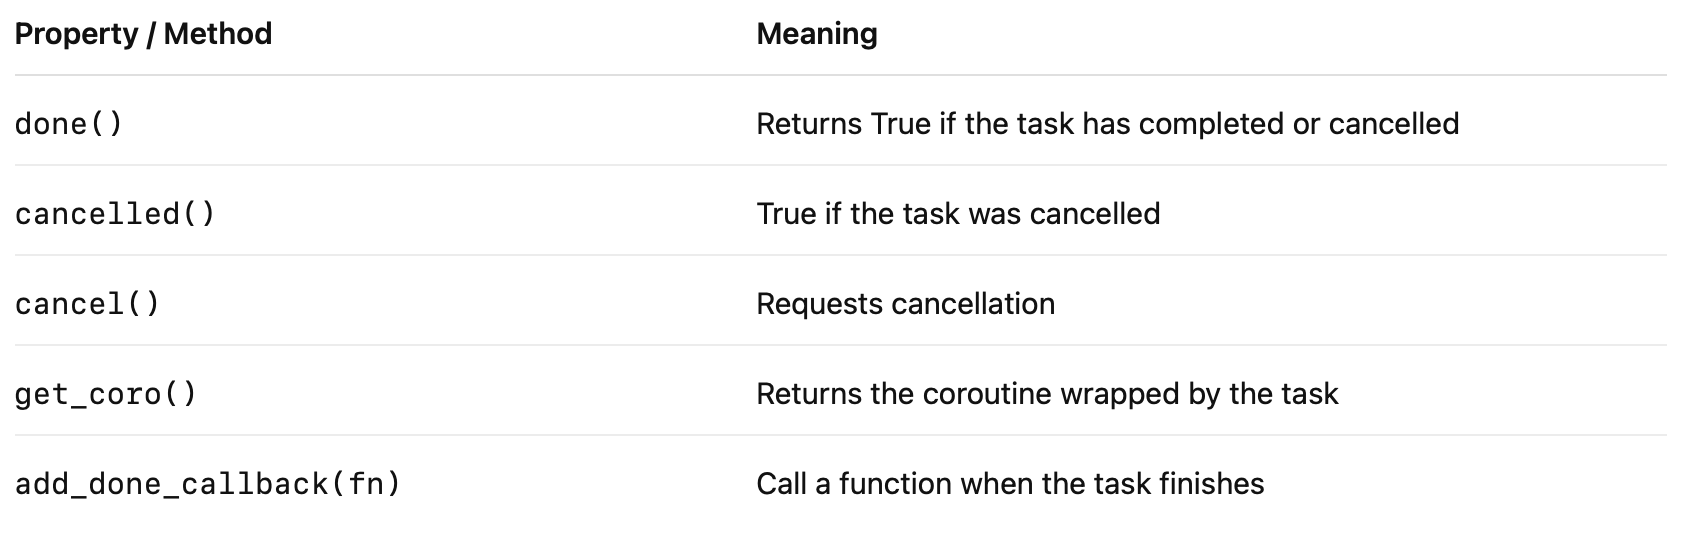

Conceptual “pause/resume” in asyncio is really:
- The task is paused whenever it hits await
- The task is resumed automatically when the awaited operation completes

## Summary 
### CPU-bound vs IO-bound
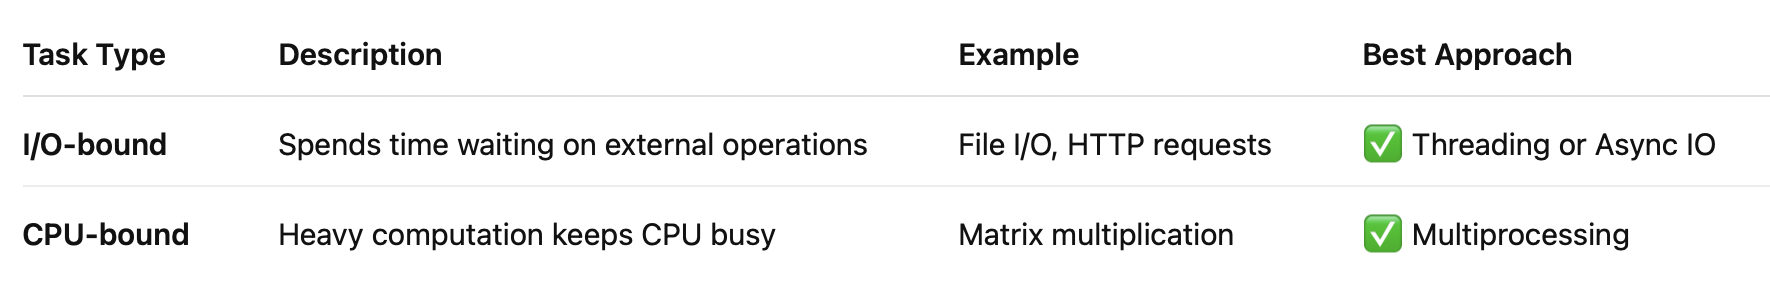

### comparision of all technique above

| Technique | Type | Concurrency / Parallelism | Best for | Pros | Cons | Example |
|---|---|---|---|---|---|---|
| Multithreading | Threads in same process | Concurrency | I/O-bound (network, file) | Lightweight, share memory | Limited by GIL for CPU tasks | threading.Thread(target=io_task) |
| Multiprocessing | Separate processes | Parallelism | CPU-bound (math, heavy computation) | True parallelism, bypass GIL | Heavy memory, slower to start | multiprocessing.Process(target=cpu_task) |
| Async IO | Single-threaded, event loop | Concurrency | I/O-bound (many small tasks) | Very lightweight, scalable | Can't do CPU-bound work efficiently | asyncio.gather(*tasks) |
| Hybrid | Threads + Async / Process Pool | Concurrency + Parallelism | Mixed workloads | Flexible, efficient | More complex | asyncio.to_thread + ProcessPoolExecutor |

Quick Guidelines
- I/O-bound tasks → use threads or async IO
- CPU-bound tasks → use multiprocessing
- Many small tasks + async-friendly I/O → async IO
- Heavy computation + I/O → consider hybrid approach

# 3. Type Hint
# 4. PEP8 and Linters
## PEP8
## Linters

# 5. Docstrings, README, Markdown
## Docstring
## README.md
# 6. File Operations
# 7. pip and Third-party Packages